7. SLAM: Simultaneous Localization and Mapping

Simulated SLAM using noisy robot motion and noisy landmark observations.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3143 (\N{TELUGU VOWEL SIGN EE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3127 (\N{TELUGU LETTER SSA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


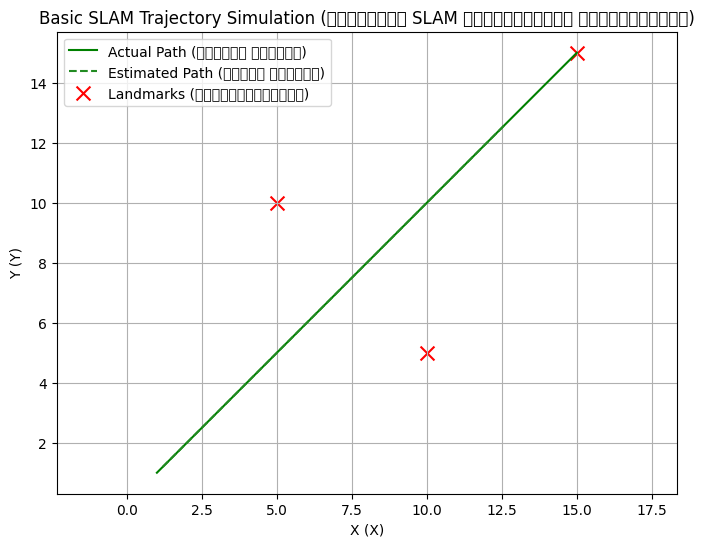

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define landmark positions
# లక్షణాల స్థానాలను నిర్వచించండి
features = np.array([[5, 10], [10, 5], [15, 15]])

# Initialize paths
# మార్గాలను ప్రారంభించండి
true_path = []
predicted_path = []

# Initialize agent's actual and estimated positions
# ఏజెంట్కి నిజమైన మరియు అంచనా స్థితులను ప్రారంభించండి
actual_pos = np.array([0.0, 0.0])
estimated_pos = np.array([0.0, 0.0])

# Noise generator for measurement and motion
# కొలత మరియు చలనం కోసం శబ్దం జనరేటర్
def generate_noise():
    return np.random.normal(0, 0.5)

# Simulation over time steps
# సమయం దశలపై సిమ్యులేషన్
for step in range(15):
    movement = np.array([1.0, 1.0])
    actual_pos = actual_pos + movement
    observation = features - actual_pos + generate_noise()
    estimated_pos = estimated_pos + movement + generate_noise()

    true_path.append(actual_pos.copy())
    predicted_path.append(estimated_pos.copy())

# Convert to numpy arrays for plotting
# ప్లాట్ చేయడానికి నంబర్‌లను numpy ఎర్రేస్‌లుగా మార్చండి
true_path = np.array(true_path)
predicted_path = np.array(predicted_path)

# Plotting the results with Green colors for paths and landmarks
# మార్గాలు మరియు లక్షణాలు కోసం ఆకుపచ్చ రంగులతో ఫలితాలను ప్లాట్ చేయడం
plt.figure(figsize=(8, 6))

# Actual path (True path) in Green
# నిజమైన మార్గం (ఆకుపచ్చ రంగులో)
plt.plot(true_path[:, 0], true_path[:, 1], label='Actual Path (నిజమైన మార్గం)', color='green')

# Predicted path (Estimated path) in Green dashed
# అంచనా మార్గం (ఆకుపచ్చ బద్ధలైన లైన్)
plt.plot(predicted_path[:, 0], predicted_path[:, 1], label='Estimated Path (అంచనా మార్గం)', color='forestgreen', linestyle='--')

# Landmarks in Red
# లక్షణాలు (ఎరుపు రంగులో)
plt.scatter(features[:, 0], features[:, 1], color='red', marker='x', s=100, label='Landmarks (లాండ్మార్క్స్)')

# Final plot settings
# చివరి ప్లాట్ సెట్టింగులు
plt.title("Basic SLAM Trajectory Simulation (ప్రాథమిక SLAM ట్రెజెక్టరీ సిమ్యులేషన్)")
plt.xlabel("X (X)")
plt.ylabel("Y (Y)")
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()
